# Audio Processing

In [47]:
!ls sep28_all_together/HeStutters_0*

sep28_all_together/HeStutters_0_0.wav	sep28_all_together/HeStutters_0_28.wav
sep28_all_together/HeStutters_0_10.wav	sep28_all_together/HeStutters_0_29.wav
sep28_all_together/HeStutters_0_11.wav	sep28_all_together/HeStutters_0_2.wav
sep28_all_together/HeStutters_0_12.wav	sep28_all_together/HeStutters_0_30.wav
sep28_all_together/HeStutters_0_13.wav	sep28_all_together/HeStutters_0_31.wav
sep28_all_together/HeStutters_0_14.wav	sep28_all_together/HeStutters_0_32.wav
sep28_all_together/HeStutters_0_15.wav	sep28_all_together/HeStutters_0_33.wav
sep28_all_together/HeStutters_0_16.wav	sep28_all_together/HeStutters_0_34.wav
sep28_all_together/HeStutters_0_17.wav	sep28_all_together/HeStutters_0_35.wav
sep28_all_together/HeStutters_0_18.wav	sep28_all_together/HeStutters_0_36.wav
sep28_all_together/HeStutters_0_19.wav	sep28_all_together/HeStutters_0_37.wav
sep28_all_together/HeStutters_0_1.wav	sep28_all_together/HeStutters_0_38.wav
sep28_all_together/HeStutters_0_20.wav	sep28_all_together/HeStutter

In [1]:
import tensorflow as tf

2023-07-04 11:03:59.308030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 11:03:59.355212: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 11:03:59.356382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 11:04:00.309668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [24]:
filename = './fluency_bank_all_together/FluencyBank_046_68.wav'

In [25]:
audio_binary = tf.io.read_file(filename)
audio, sampling_rate = tf.audio.decode_wav(audio_binary) 

path_parts = tf.strings.split(filename, '/')
path_end = path_parts[-1]
file_parts = tf.strings.split(path_end, '_')
label = file_parts[0]

# path_parts = tf.strings.split(filename, '/')
# path_end = path_parts[-1]
# file_parts = tf.strings.split(path_end, '_')
# pod_id = int(file_parts[-2])
# clip_id = int(tf.strings.split(file_parts[-1], '.')[-2])
# label = df[(df['EpId'] == pod_id) & (df['ClipId'] == clip_id)].to_numpy()[0][5:]
# label_id = tf.convert_to_tensor(label, dtype=tf.int64)

In [26]:
print('Label:', label) 
print('Label:', label.numpy().decode())
print('Audio shape:', audio.shape)
print('Sampling rate:', sampling_rate.numpy())

import IPython
IPython.display.Audio(filename=filename, rate=sampling_rate)


Label: tf.Tensor(b'FluencyBank', shape=(), dtype=string)
Label: FluencyBank
Audio shape: (48000, 1)
Sampling rate: 16000


# Channel selection/squeezing

In [35]:
audio = tf.squeeze(audio)
print('Audio shape:', audio.shape)

Audio shape: (48000,)


In [36]:
audio.numpy(), audio.numpy().squeeze()

(array([-0.00408936, -0.00488281, -0.00518799, ..., -0.0015564 ,
        -0.00296021, -0.00308228], dtype=float32),
 array([-0.00408936, -0.00488281, -0.00518799, ..., -0.0015564 ,
        -0.00296021, -0.00308228], dtype=float32))

In [7]:
import pandas as pd
import numpy as np

plot = {
    'Time': np.arange(audio.shape[0])[0::10],
    'Amplitude': audio.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

In [8]:
DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"bin":false,"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false},"legend":null}}}""")

NameError: name 'DeepnoteChart' is not defined

# Data Padding

In [37]:
zero_padding = tf.zeros(tf.shape(audio) - tf.shape(audio), dtype=tf.float32)
audio_padded = tf.concat([audio, zero_padding], axis=0)

print('Padded Audio shape:', audio_padded.shape)

plot = {
    'Time': np.arange(audio_padded.shape[0])[0::10],
    'Amplitude': audio_padded.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

Padded Audio shape: (48000,)


In [23]:
DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

# Resampling

In [38]:
import tensorflow_io as tfio

audio_8k = tfio.audio.resample(audio_padded, sampling_rate.numpy(), 8000)

print('Resampled Audio shape:', audio_8k.shape)

plot = {
    'Time': np.arange(audio_8k.shape[0])[0::10],
    'Amplitude': audio_8k.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

Resampled Audio shape: (24000,)


In [29]:
DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

# Discrete Fourier Transform

In [39]:
audio_fft = tf.signal.rfft(audio_8k)
print(audio_fft[0])

audio_fft_magnitude = tf.abs(audio_fft)

print('FFT shape:', audio_fft.shape)

plot = {
    'Frequency': np.arange(0, audio_fft_magnitude.shape[0])[0::10],
    'Magnitude': audio_fft_magnitude.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

tf.Tensor((-0.34638745+2.8192997e-05j), shape=(), dtype=complex64)
FFT shape: (12001,)


In [12]:
DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Magnitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

NameError: name 'DeepnoteChart' is not defined

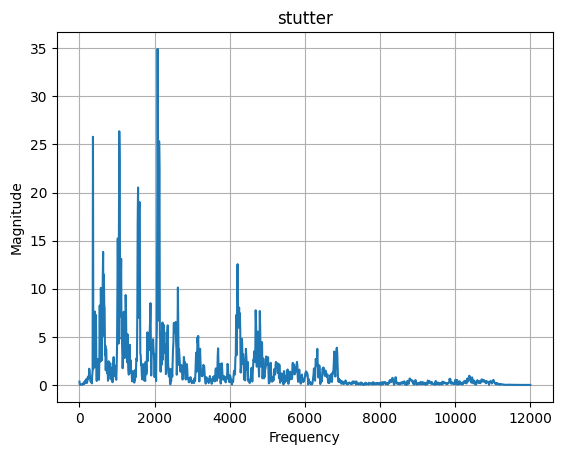

In [40]:
import matplotlib.pyplot as plt

plt.plot(plot['Frequency'], plot['Magnitude'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title(f'{label.numpy().decode()}')
plt.grid()
plt.savefig(f'{label.numpy().decode()}.png')

# Short Time Fourier Transform (STFT)

In [59]:
frame_length_in_s = 0.016
frame_step_in_s = 0.016

frame_length = int(frame_length_in_s * sampling_rate.numpy())
frame_step = int(frame_step_in_s * sampling_rate.numpy())

stft = tf.signal.stft(
    audio_padded, 
    frame_length=frame_length,
    frame_step=frame_step,
    fft_length=frame_length
)
spectrogram = tf.abs(stft)

print('frame_length:', frame_length)
print('frame_step:', frame_step)
print('audio-padded shape:', audio_padded.shape)
print('stft shape:', stft.shape)
print('Spectrogram shape:', spectrogram.shape)
# (# Frames, # Frequncies)

frame_length: 256
frame_step: 256
audio-padded shape: (48000,)
stft shape: (187, 129)
Spectrogram shape: (187, 129)


log_spectrogram_vis: (129, 187)


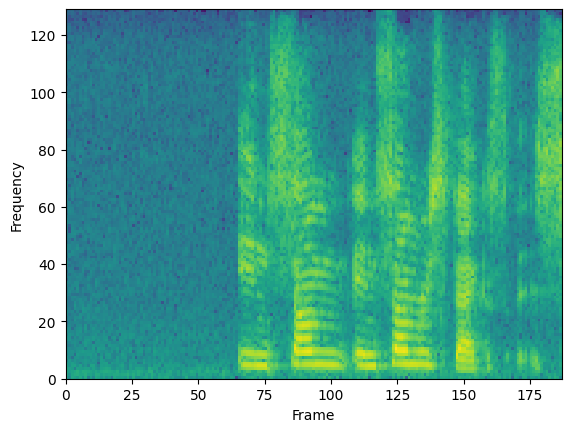

In [60]:
import matplotlib.pyplot as plt

# we add 1.e-6 to avoid getting zero for log to be infinite

log_spectrogram = tf.math.log(spectrogram + 1.e-6)

# Matplotlib requires (Y, X) data for a correct visualization
log_spectrogram_vis = tf.transpose(log_spectrogram)
print('log_spectrogram_vis:',log_spectrogram_vis.shape)


plt.pcolormesh(log_spectrogram_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.show()

# Mel spectrogram

In [61]:
num_spectrogram_bins = spectrogram.shape[1] # frame_length // 2 + 1
num_mel_bins = 40
lower_frequency = 20
upper_frequency = 8000

linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
    num_mel_bins=num_mel_bins,
    num_spectrogram_bins=num_spectrogram_bins,
    sample_rate=sampling_rate,
    lower_edge_hertz=lower_frequency,
    upper_edge_hertz=upper_frequency
)
print('Mel Filters Matrix shape:', linear_to_mel_weight_matrix.shape)

mel_spectrogram = tf.matmul(spectrogram, linear_to_mel_weight_matrix)

print('Mel Spectrogram shape:', mel_spectrogram.shape)

log_mel_spectrogram = tf.math.log(mel_spectrogram + 1.e-6)

Mel Filters Matrix shape: (129, 40)
Mel Spectrogram shape: (187, 40)


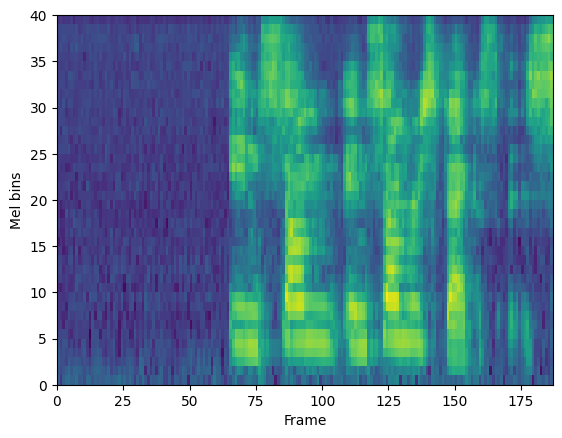

In [62]:
# Matplotlib requires (Y, X) data for a correct visualization
log_mel_spectrogram_vis = tf.transpose(log_mel_spectrogram)

plt.pcolormesh(log_mel_spectrogram_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Mel bins')
plt.show()

# Mel-Frequency Cepstral Coefficients (MFCCs)

In [63]:
mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrogram)
print('MFCCs shape:', mfccs.shape)



MFCCs shape: (187, 40)


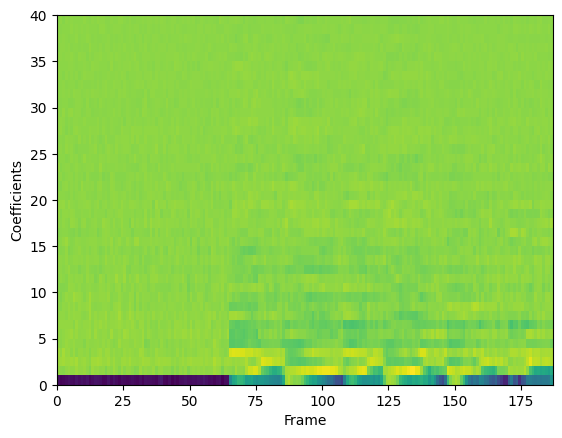

In [64]:
mfccs_vis = tf.transpose(mfccs)

plt.pcolormesh(mfccs_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Coefficients')
plt.show()

In [69]:
num_coefficients = 20
mfccs = mfccs[..., :num_coefficients]

print('MFCCs shape:', mfccs.shape)

MFCCs shape: (187, 10)


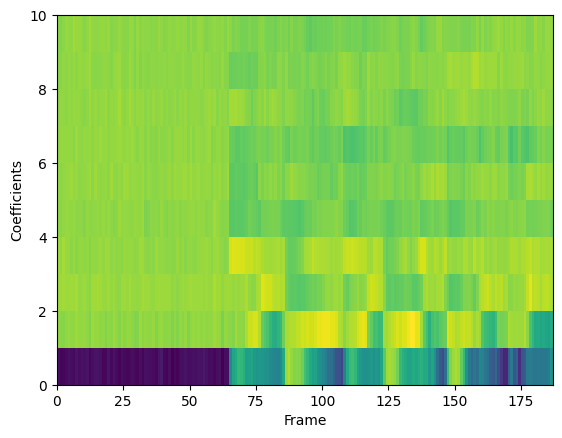

In [70]:
mfccs_vis = tf.transpose(mfccs)

plt.pcolormesh(mfccs_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Coefficients')
plt.show()

# Resizing

Origianl Spectraogram shape: (187, 129, 1)
Resized Spectrogram shape: (32, 32, 1)


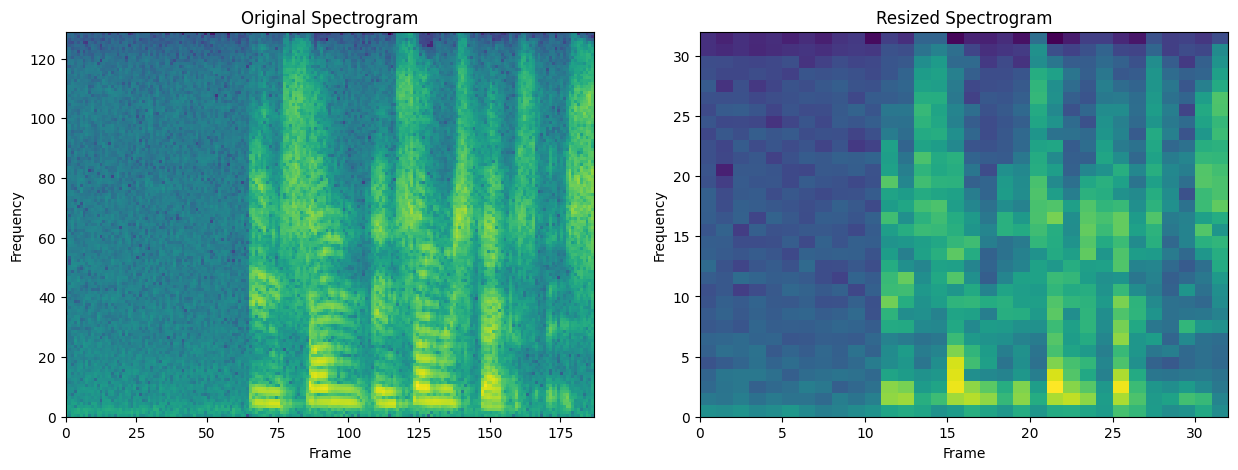

In [67]:
spectrogram_image = tf.expand_dims(spectrogram, -1)
resized_spectrogram = tf.image.resize(spectrogram_image, [32, 32])

print('Origianl Spectraogram shape:', spectrogram_image.shape)
print('Resized Spectrogram shape:', resized_spectrogram.shape)

log_resized_spectrogram = tf.math.log(resized_spectrogram + 1.e-6)

# Matplotlib requires (Y, X) data for a correct visualization
log_resized_spectrogram_vis = tf.transpose(log_resized_spectrogram)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.pcolormesh(log_spectrogram_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.title('Original Spectrogram')

plt.subplot(1,2,2)
plt.pcolormesh(log_resized_spectrogram_vis.numpy().squeeze())
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.title('Resized Spectrogram')
plt.show()

Origianl Mel Spectraogram shape: (187, 40, 1)
Resized Mel Spectrogram shape: (32, 32, 1)


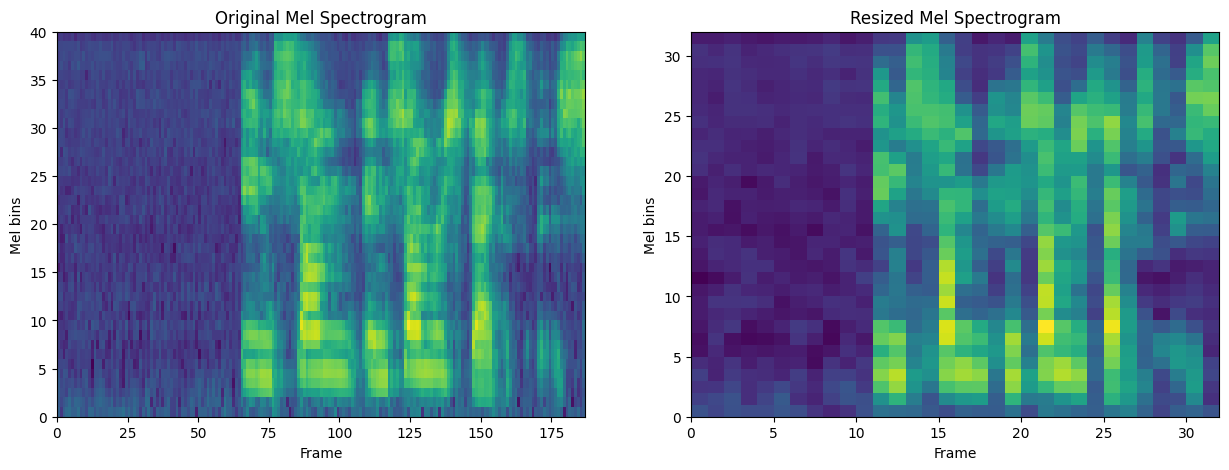

In [68]:
mel_spectrogram_image = tf.expand_dims(mel_spectrogram, -1)
resized_mel_spectrogram = tf.image.resize(mel_spectrogram_image, [32, 32])

print('Origianl Mel Spectraogram shape:', mel_spectrogram_image.shape)
print('Resized Mel Spectrogram shape:', resized_mel_spectrogram.shape)

log_resized_mel_spectrogram = tf.math.log(resized_mel_spectrogram + 1.e-6)

# Matplotlib requires (Y, X) data for a correct visualization
log_resized_mel_spectrogram_vis = tf.transpose(log_resized_mel_spectrogram)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.pcolormesh(log_mel_spectrogram_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Mel bins')
plt.title('Original Mel Spectrogram')

plt.subplot(1,2,2)
plt.pcolormesh(log_resized_mel_spectrogram_vis.numpy().squeeze())
plt.xlabel('Frame')
plt.ylabel('Mel bins')
plt.title('Resized Mel Spectrogram')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c74a7a1-d505-4b2b-a4fa-efea0c0f20da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>